##### Reference: 
https://databricks.com/blog/2019/09/10/doing-multivariate-time-series-forecasting-with-recurrent-neural-networks.html

## Appliance Energy Usage: A Multivariate Time Series Forecasting Example
Experimental data used to create regression models of appliances energy use in a low energy building.


#### Data Set Information:

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters).


#### Original source of the dataset:

http://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction


#### Attribute Information:
For detailed list of all attributes and datatypes, please see the link above


Where indicated, hourly data (then interpolated) from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of weather data.

### 1. Load the data

In [0]:
#df = spark.read.csv('/mnt/ved-demo/timeseries/energydata_complete.csv', header=True, inferSchema=True)

df = spark.read.format("csv").load("dbfs:/FileStore/ml_data/energydata_complete.csv", header=True, inferSchema=True)
display(df)
df.count()

date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
2016-01-11 17:00:00,60.0,30.0,19.89,47.5966666666667,19.2,44.79,19.79,44.73,19.0,45.5666666666667,17.1666666666667,55.2,7.02666666666667,84.2566666666667,17.2,41.6266666666667,18.2,48.9,17.0333333333333,45.53,6.6,733.5,92.0,7.0,63.0,5.3,13.275433157104999,13.275433157104999
2016-01-11 17:10:00,60.0,30.0,19.89,46.6933333333333,19.2,44.7225,19.79,44.79,19.0,45.9925,17.1666666666667,55.2,6.83333333333333,84.0633333333333,17.2,41.56,18.2,48.8633333333333,17.0666666666667,45.56,6.48333333333333,733.6,92.0,6.66666666666667,59.1666666666667,5.2,18.606194981839508,18.606194981839508
2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.6266666666667,19.79,44.9333333333333,18.9266666666667,45.89,17.1666666666667,55.09,6.56,83.1566666666667,17.2,41.4333333333333,18.2,48.73,17.0,45.5,6.36666666666667,733.7,92.0,6.33333333333333,55.3333333333333,5.1,28.64266816759482,28.64266816759482
2016-01-11 17:30:00,50.0,40.0,19.89,46.0666666666667,19.2,44.59,19.79,45.0,18.89,45.7233333333333,17.1666666666667,55.09,6.43333333333333,83.4233333333333,17.1333333333333,41.29,18.1,48.59,17.0,45.4,6.25,733.8,92.0,6.0,51.5,5.0,45.41038949973881,45.41038949973881
2016-01-11 17:40:00,60.0,40.0,19.89,46.3333333333333,19.2,44.53,19.79,45.0,18.89,45.53,17.2,55.09,6.36666666666667,84.8933333333333,17.2,41.23,18.1,48.59,17.0,45.4,6.13333333333333,733.9,92.0,5.66666666666667,47.6666666666667,4.9,10.08409655187279,10.08409655187279
2016-01-11 17:50:00,50.0,40.0,19.89,46.0266666666667,19.2,44.5,19.79,44.9333333333333,18.89,45.73,17.1333333333333,55.03,6.3,85.7666666666667,17.1333333333333,41.26,18.1,48.59,17.0,45.29,6.01666666666667,734.0,92.0,5.33333333333333,43.8333333333333,4.8,44.91948424838483,44.91948424838483
2016-01-11 18:00:00,60.0,50.0,19.89,45.7666666666667,19.2,44.5,19.79,44.9,18.89,45.79,17.1,54.9666666666667,6.26333333333333,86.09,17.1333333333333,41.2,18.1,48.59,17.0,45.29,5.9,734.1,92.0,5.0,40.0,4.7,47.23376343026757,47.23376343026757
2016-01-11 18:10:00,60.0,50.0,19.8566666666667,45.56,19.2,44.5,19.73,44.9,18.89,45.8633333333333,17.1,54.9,6.19,86.4233333333333,17.1,41.2,18.1,48.59,17.0,45.29,5.91666666666667,734.166666666667,91.8333333333333,5.16666666666667,40.0,4.68333333333333,33.03988962434232,33.03988962434232
2016-01-11 18:20:00,60.0,40.0,19.79,45.5975,19.2,44.4333333333333,19.73,44.79,18.89,45.79,17.1666666666667,55.0,6.12333333333333,87.2266666666667,17.1666666666667,41.4,18.1,48.59,17.0,45.29,5.93333333333333,734.233333333333,91.6666666666667,5.33333333333333,40.0,4.66666666666667,31.455702194944024,31.455702194944024
2016-01-11 18:30:00,70.0,40.0,19.8566666666667,46.09,19.23,44.4,19.79,44.8633333333333,18.89,46.0966666666667,17.1,55.0,6.19,87.6266666666667,17.2,41.5,18.1,48.59,17.0,45.29,5.95,734.3,91.5,5.5,40.0,4.65,3.089313523378223,3.089313523378223


Out[1]: 19735

### 2. Normalize and prepare the dataset

In [0]:
# For this problem, we randomly select feature columns except 'Appliances' which we are trying to predict

from pyspark.sql.functions import round

# Drop nulls and date column
df = df.dropna() 
dataset = df.drop('date')


# Round up the columns data to one decimal point
columns = dataset.columns
for i in columns:
  dataset = dataset.withColumn(i, round(i, 1))
  
display(dataset)

Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
60.0,30.0,19.9,47.6,19.2,44.8,19.8,44.7,19.0,45.6,17.2,55.2,7.0,84.3,17.2,41.6,18.2,48.9,17.0,45.5,6.6,733.5,92.0,7.0,63.0,5.3,13.3,13.3
60.0,30.0,19.9,46.7,19.2,44.7,19.8,44.8,19.0,46.0,17.2,55.2,6.8,84.1,17.2,41.6,18.2,48.9,17.1,45.6,6.5,733.6,92.0,6.7,59.2,5.2,18.6,18.6
50.0,30.0,19.9,46.3,19.2,44.6,19.8,44.9,18.9,45.9,17.2,55.1,6.6,83.2,17.2,41.4,18.2,48.7,17.0,45.5,6.4,733.7,92.0,6.3,55.3,5.1,28.6,28.6
50.0,40.0,19.9,46.1,19.2,44.6,19.8,45.0,18.9,45.7,17.2,55.1,6.4,83.4,17.1,41.3,18.1,48.6,17.0,45.4,6.3,733.8,92.0,6.0,51.5,5.0,45.4,45.4
60.0,40.0,19.9,46.3,19.2,44.5,19.8,45.0,18.9,45.5,17.2,55.1,6.4,84.9,17.2,41.2,18.1,48.6,17.0,45.4,6.1,733.9,92.0,5.7,47.7,4.9,10.1,10.1
50.0,40.0,19.9,46.0,19.2,44.5,19.8,44.9,18.9,45.7,17.1,55.0,6.3,85.8,17.1,41.3,18.1,48.6,17.0,45.3,6.0,734.0,92.0,5.3,43.8,4.8,44.9,44.9
60.0,50.0,19.9,45.8,19.2,44.5,19.8,44.9,18.9,45.8,17.1,55.0,6.3,86.1,17.1,41.2,18.1,48.6,17.0,45.3,5.9,734.1,92.0,5.0,40.0,4.7,47.2,47.2
60.0,50.0,19.9,45.6,19.2,44.5,19.7,44.9,18.9,45.9,17.1,54.9,6.2,86.4,17.1,41.2,18.1,48.6,17.0,45.3,5.9,734.2,91.8,5.2,40.0,4.7,33.0,33.0
60.0,40.0,19.8,45.6,19.2,44.4,19.7,44.8,18.9,45.8,17.2,55.0,6.1,87.2,17.2,41.4,18.1,48.6,17.0,45.3,5.9,734.2,91.7,5.3,40.0,4.7,31.5,31.5
70.0,40.0,19.9,46.1,19.2,44.4,19.8,44.9,18.9,46.1,17.1,55.0,6.2,87.6,17.2,41.5,18.1,48.6,17.0,45.3,6.0,734.3,91.5,5.5,40.0,4.7,3.1,3.1


In [0]:
%sh

pip install tensorflow
pip install keras
pip install mlflow

Requirement already satisfied: tensorflow in /databricks/python3/lib/python3.7/site-packages (2.4.0)
Requirement already satisfied: termcolor~=1.1.0 in /databricks/python3/lib/python3.7/site-packages (from tensorflow) (1.1.0)
Requirement already satisfied: six~=1.15.0 in /databricks/python3/lib/python3.7/site-packages (from tensorflow) (1.15.0)
Requirement already satisfied: gast==0.3.3 in /databricks/python3/lib/python3.7/site-packages (from tensorflow) (0.3.3)
Requirement already satisfied: tensorboard~=2.4 in /databricks/python3/lib/python3.7/site-packages (from tensorflow) (2.4.0)
Requirement already satisfied: numpy~=1.19.2 in /databricks/python3/lib/python3.7/site-packages (from tensorflow) (1.19.4)
Requirement already satisfied: flatbuffers~=1.12.0 in /databricks/python3/lib/python3.7/site-packages (from tensorflow) (1.12)
Requirement already satisfied: tensorflow-estimator<2.5.0,>=2.4.0rc0 in /databricks/python3/lib/python3.7/site-packages (from tensorflow) (2.4.0)
Requirement already satisfied: astunparse~=1.6.3 in /databricks/python3/lib/python3.7/site-packages (from tensorflow) (1.6.3)
Requirement already satisfied: h5py~=2.10.0 in /databricks/python3/lib/python3.7/site-packages (from tensorflow) (2.10.0)
Requirement already satisfied: grpcio~=1.32.0 in /databricks/python3/lib/python3.7/site-packages (from tensorflow) (1.32.0)
Requirement already satisfied: keras-preprocessing~=1.1.2 in /databricks/python3/lib/python3.7/site-packages (from tensorflow) (1.1.2)
Requirement already satisfied: opt-einsum~=3.3.0 in /databricks/python3/lib/python3.7/site-packages (from tensorflow) (3.3.0)
Requirement already satisfied: absl-py~=0.10 in /databricks/python3/lib/python3.7/site-packages (from tensorflow) (0.11.0)
Requirement already satisfied: protobuf>=3.9.2 in /databricks/python3/lib/python3.7/site-packages (from tensorflow) (3.14.0)
Requirement already satisfied: google-pasta~=0.2 in /databricks/python3/lib/python3.7/site-packages (from tensorflow) (0.2.0)
Requirement already satisfied: typing-extensions~=3.7.4 in /databricks/python3/lib/python3.7/site-packages (from tensorflow) (3.7.4.3)
Requirement already satisfied: wrapt~=1.12.1 in /databricks/python3/lib/python3.7/site-packages (from tensorflow) (1.12.1)
Requirement already satisfied: wheel~=0.35 in /databricks/python3/lib/python3.7/site-packages (from tensorflow) (0.36.2)
Requirement already satisfied: tensorboard-plugin-wit>=1.6.0 in /databricks/python3/lib/python3.7/site-packages (from tensorboard~=2.4->tensorflow) (1.7.0)
Requirement already satisfied: markdown>=2.6.8 in /databricks/python3/lib/python3.7/site-packages (from tensorboard~=2.4->tensorflow) (3.3.3)
Requirement already satisfied: werkzeug>=0.11.15 in /databricks/python3/lib/python3.7/site-packages (from tensorboard~=2.4->tensorflow) (1.0.1)
Requirement already satisfied: google-auth-oauthlib<0.5,>=0.4.1 in /databricks/python3/lib/python3.7/site-packages (from tensorboard~=2.4->tensorflow) (0.4.2)
Requirement already satisfied: google-auth<2,>=1.6.3 in /databricks/python3/lib/python3.7/site-packages (from tensorboard~=2.4->tensorflow) (1.24.0)
Requirement already satisfied: requests<3,>=2.21.0 in /databricks/python3/lib/python3.7/site-packages (from tensorboard~=2.4->tensorflow) (2.22.0)
Requirement already satisfied: setuptools>=41.0.0 in /usr/local/lib/python3.7/dist-packages (from tensorboard~=2.4->tensorflow) (45.2.0)
Requirement already satisfied: importlib-metadata; python_version < "3.8" in /databricks/python3/lib/python3.7/site-packages (from markdown>=2.6.8->tensorboard~=2.4->tensorflow) (3.3.0)
Requirement already satisfied: requests-oauthlib>=0.7.0 in /databricks/python3/lib/python3.7/site-packages (from google-auth-oauthlib<0.5,>=0.4.1->tensorboard~=2.4->tensorflow) (1.3.0)
Requirement already satisfied: cachetools<5.0,>=2.0.0 in /databricks/python3/lib/python3.7/site-packages (from google-auth<2,>=1.6.3->tensorboard~=2.4->tensorflow) (4.2.0)
Requirement already satisfied: pyasn1-modules>=0.

In [0]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
import numpy as np 

values = dataset.collect() # should return a list 
type(values)
len(values)
# This estimator standardizes features by removing the mean and scaling to unit variance such that the values are centered around 0 
scaler = StandardScaler()
scaled = scaler.fit_transform(values)

# Create features and label dataset. NOTE: We're predicting a value 24 hours into the future. 

X = scaled[:][:-144] # All of the above columns and remove readings from last 24 hours
y = scaled[:, 0][144:] # Appliances or the target/label column and remove readings from first 24 hours


### 3. Train-Test Split and create Lagged Sequences

In [0]:
from sklearn.model_selection import train_test_split

# split into train and test sets
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.20, random_state=42, shuffle = False)

# Create overlapping windows of lagged values for training and testing datasets
timesteps = 864
train_generator = TimeseriesGenerator(trainX, trainY, length=timesteps, sampling_rate=1, batch_size=timesteps)
test_generator = TimeseriesGenerator(testX, testY, length=timesteps, sampling_rate=1, batch_size=timesteps)

### 4. Data Validation

***Total number of samples in our data (n) = 19735***

***Total number of samples in our data after adjusting for 24 hours (n - 144) = 19591***

**Before Time series Generator:** 

1. Number of samples in training set (.8 * n) = 15672
2. Number of samples in testing set (.2 * n) = 3919

**After Time series Generator:**

1. Number of samples in the training feature set = 15552
2. Number of samples in the testing label set = 3456
3. The shape of the input set should be (batch_size, timesteps, input_dim) [https://keras.io/layers/recurrent/]. 

In step 1, we choose all columns except date, so our input dimension will be 28.

In [0]:
train_X, train_y = train_generator[0]
test_X, test_y = test_generator[0]

train_samples = train_X.shape[0]*len(train_generator)
test_samples = test_X.shape[0]*len(test_generator)

print("Total Records (n): {}".format(df.count()))
print("Total Records after adjusting for 24 hours: {}".format(len(X)))
print("Number of samples in training set (.8 * n): trainX = {}".format(trainX.shape[0]))
print("Number of samples in testing set (.2 * n): testX = {}".format(testX.shape[0]))
print("Size of individual batches: {}".format(test_X.shape[1]))
print("Number of total samples in training feature set: {}".format(train_samples))
print("Number of samples in testing feature set: {}".format(test_samples))

Total Records (n): 19735
Total Records after adjusting for 24 hours: 19591
Number of samples in training set (.8 * n): trainX = 15672
Number of samples in testing set (.2 * n): testX = 3919
Size of individual batches: 864
Number of total samples in training feature set: 15552
Number of samples in testing feature set: 3456

### 5. Model Training

In [0]:
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.callbacks import EarlyStopping
import mlflow
import mlflow.keras


# LSTM expects the input data in a specific 3D format of test sample size, time steps, no. of input features. We had defined the time steps as n_lag variable in previous step.  Time steps are the past observations that the network will learn from (e.g. backpropagation through time).

# For details on what individual hyperparameters mean, see here: https://github.com/keras-team/keras/blob/master/keras/layers/recurrent.py#L2051

units = 128
num_epoch = 2
learning_rate = 0.00144

with mlflow.start_run(nested=True):

  model = Sequential()
  model.add(LSTM(units, input_shape=(train_X.shape[1], train_X.shape[2])))
  model.add(LeakyReLU(alpha=0.5)) 
  model.add(Dropout(0.1))
  model.add(Dense(1))

  adam = Adam(lr=learning_rate)
  # Stop training when a monitored quantity has stopped improving.
  callback = [EarlyStopping(monitor="loss", min_delta = 0.00001, patience = 50, mode = 'auto', restore_best_weights=True)] 

  # Using regression loss function 'Mean Standard Error' and validation metric 'Mean Absolute Error'
  model.compile(loss='mse', optimizer=adam, metrics=['mae'])

# fit network
  history = model.fit_generator(train_generator, \
                                epochs=num_epoch, \
                                validation_data=test_generator, \
                                callbacks = callback, \
                                verbose=2, \
                                shuffle=False, \
                                initial_epoch=0)

  mlflow.log_param("Units", units)
  mlflow.log_param("Epochs", num_epoch)
  mlflow.log_param("Learning Rate", learning_rate)
  mlflow.log_param("Lags cosidered", timesteps)

#   Return loss value and metric value
  score = model.evaluate_generator(test_generator, verbose=0)   
  mlflow.log_metric("Test Loss", score[0]) 
  mlflow.log_metric("MAE", score[1])   
  mlflow.log_metric("Actual Epochs", len(history.history['loss']))
  mlflow.keras.log_model(model, "LSTM Model")
    
  # The model can be saved for future use and move to production
#   mlflow.keras.save_model(model1, "/dbfs/ved-demo/timeseries/best-appliance-model/")

/databricks/python/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
 warnings.warn('`Model.fit_generator` is deprecated and '
Epoch 1/2
18/18 - 223s - loss: 1.0388 - mae: 0.6345 - val_loss: 0.7604 - val_mae: 0.5845
Epoch 2/2
18/18 - 207s - loss: 0.9455 - mae: 0.5240 - val_loss: 0.7579 - val_mae: 0.4777
/databricks/python/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
 warnings.warn('`Model.evaluate_generator` is deprecated and '

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type) Output Shape Param # 
=================================================================
lstm (LSTM) (None, 128) 80384 
_________________________________________________________________
leaky_re_lu (LeakyReLU) (None, 128) 0 
_________________________________________________________________
dropout (Dropout) (None, 128) 0 
_________________________________________________________________
dense (Dense) (None, 1) 129 
=================================================================
Total params: 80,513
Trainable params: 80,513
Non-trainable params: 0
_________________________________________________________________

### 6. Model Evaluation

1. Use Mlflow to track model runs and experiments over time, visualise train and validation errors
2. Make and visualise predictions

#### i. Plot train and test errors

In [0]:
history.history

Out[12]: {'loss': [1.0388325452804565, 0.9455196261405945],
 'mae': [0.6345135569572449, 0.5240358114242554],
 'val_loss': [0.7604354619979858, 0.7578900456428528],
 'val_mae': [0.5844863057136536, 0.477719783782959]}

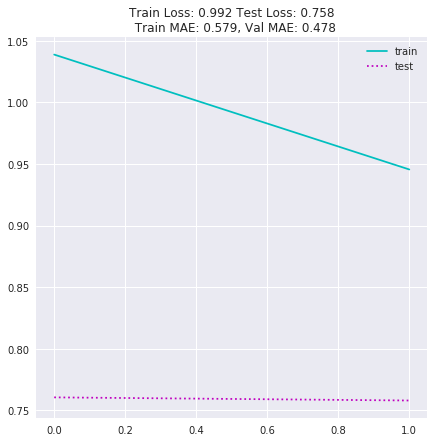

In [0]:
from matplotlib import pyplot
import numpy as np

# Calculate the train loss and train metric, in this case mean absolute error
train_loss = np.mean(history.history['loss'])
train_mae = np.mean(history.history['mae'])

title = 'Train Loss: {0:.3f} Test Loss: {1:.3f}\n  Train MAE: {2:.3f}, Val MAE: {3:.3f}'.format(train_loss, score[0], train_mae, score[1])

# Plot loss function
fig = pyplot.figure()
pyplot.style.use('seaborn')

pyplot.plot(history.history['loss'], 'c-', label='train')
pyplot.plot(history.history['val_loss'], 'm:', label='test')
# pyplot.text(epoch-2, 0.07, rmse , style='italic')
pyplot.title(title)
pyplot.legend()
pyplot.grid(True)
fig.set_size_inches(w=7,h=7)
pyplot.close()
display(fig)

#### ii. Make predictions

In [0]:
# Make predictions

import numpy as np

yhat_train_temp = model.predict_generator(train_generator)
yhat_test_temp = model.predict_generator(test_generator)

n_lead = 1

yhat_train = yhat_train_temp[:, n_lead-1]
yhat_test = yhat_test_temp[:, n_lead-1]

# Shift predictions for plotting

# training results
yhat_train_plot = np.empty(shape=[y.shape[0],])
yhat_train_plot[:] = np.nan
yhat_train.shape = yhat_train.shape[0]
yhat_train_plot.shape = yhat_train_plot.shape[0]
yhat_train_plot[timesteps:len(yhat_train)+timesteps] = yhat_train
  
#test results
yhat_test_plot = np.empty(shape=[y.shape[0],])
yhat_test_plot[:] = np.nan
yhat_test.shape = yhat_test.shape[0]
yhat_test_plot.shape = yhat_test_plot.shape[0]
yhat_test_plot[len(yhat_train)+(timesteps*2):len(y)] = yhat_test
# len(targets), len(yhat_train), len(yhat_test_plot)

/databricks/python/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
 warnings.warn('`Model.predict_generator` is deprecated and '

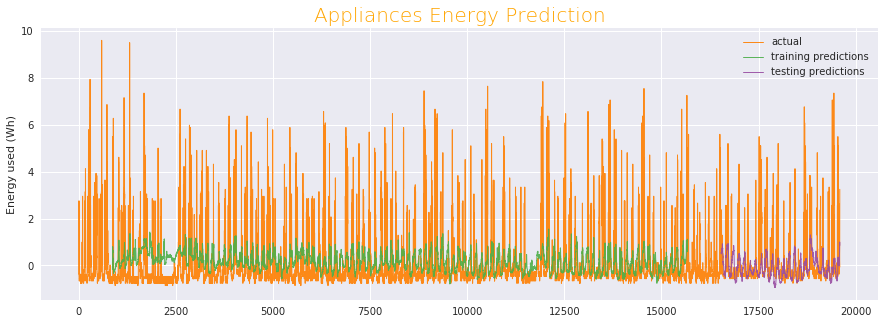

In [0]:
from matplotlib import pyplot

fig = pyplot.figure()
pyplot.style.use('seaborn')
palette = pyplot.get_cmap('Set1')
# pyplot.plot(y[:, n_lead-1], marker='', color=palette(4), linewidth=1, alpha=0.9, label='actual')
pyplot.plot(y, marker='', color=palette(4), linewidth=1, alpha=0.9, label='actual')
pyplot.plot(yhat_train_plot, marker='', color=palette(2), linewidth=1, alpha=0.9, label='training predictions')
pyplot.plot(yhat_test_plot, marker='', color=palette(3), linewidth=1, alpha=0.9, label='testing predictions')

pyplot.title('Appliances Energy Prediction', loc='center', fontsize=20, fontweight=5, color='orange')
pyplot.ylabel('Energy used (Wh)')
pyplot.legend()
fig.set_size_inches(w=15,h=5)
pyplot.close()

display(fig)